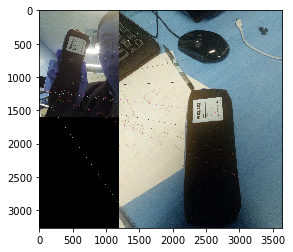

(<matplotlib.image.AxesImage at 0x268844f89e8>, None)

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1=cv2.imread('D:\computervision\cc2.jpg')
img2=cv2.imread('D:\computervision\cc3.jpg')

sift=cv2.xfeatures2d.SIFT_create()

kp1,des1=sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)

bf=cv2.BFMatcher()
matches=bf.match(des1,des2)

maches=sorted(matches,key=lambda x:x.distance)

img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.imshow(img3),plt.show()


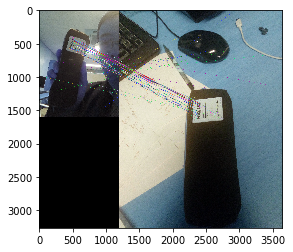

(<matplotlib.image.AxesImage at 0x26880030ac8>, None)

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('D:\computervision\cc2.jpg')          # queryImage
img2 = cv2.imread('D:\computervision\cc3.jpg') # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

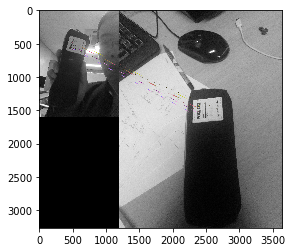

(<matplotlib.image.AxesImage at 0x268844da630>, None)

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('D:\computervision\cc2.jpg',0)          # queryImage
img2 = cv2.imread('D:\computervision\cc3.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()